# TM10007 Assignment template

In [ ]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/jveenland/tm10007_ml.git

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.3 MB/s eta 0:00:00


## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [1]:
# Data loading functions. Uncomment the one you want to use
import pandas as pd
from worcliver.load_data import load_data

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as ds

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier


data = load_data()
data_df = pd.DataFrame(data)
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')



The number of samples: 186
The number of columns: 494


In [18]:
# Some functions we will use
from sklearn.decomposition import PCA

def colorplot(clf, ax, x, y, h=100):
    '''
    Overlay the decision areas as colors in an axes.

    Input:
        clf: trained classifier
        ax: axis to overlay color mesh on
        x: feature on x-axis
        y: feature on y-axis
        h(optional): steps in the mesh
    '''
    # Create a meshgrid the size of the axis
    xstep = (x.max() - x.min() ) / 20.0
    ystep = (y.max() - y.min() ) / 20.0
    x_min, x_max = x.min() - xstep, x.max() + xstep
    y_min, y_max = y.min() - ystep, y.max() + ystep
    h = max((x_max - x_min, y_max - y_min))/h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if len(Z.shape) > 1:
        Z = Z[:, 1]

    # Put the result into a color plot
    cm = plt.cm.RdBu_r
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    del xx, yy, x_min, x_max, y_min, y_max, Z, cm

def load_data(liver_data):
    '''
    Load the sklearn breast data set, but reduce the number of features with PCA.
    '''
    data = liver_data
    x = data.drop(columns=['label'])  # If the label column has a specific name like 'target'

    y = data['label']

    # p = PCA(n_components=n_features)
    # p = p.fit(x)
    # x = p.transform(x)
    return x, y

AttributeError: 'DataFrame' object has no attribute '_validate_params'

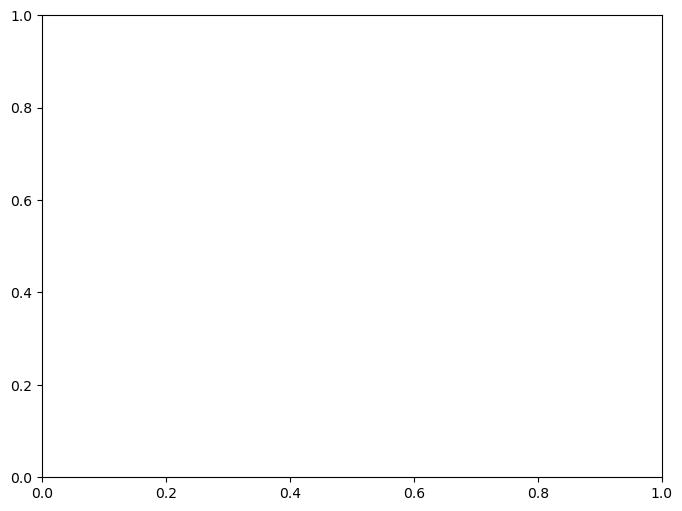

In [ ]:
# Load and plot three different classification datasets
# X2, Y2 = ds.make_classification(n_samples=100, n_features=2, n_redundant=0,
#                                 n_informative=1,
#                                 n_clusters_per_class=1)
# fig = plt.figure(figsize=(24,8))
# ax = fig.add_subplot(131)
# ax.set_title("One informative feature, one cluster per class", fontsize='small')
# ax.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
#             s=25, edgecolor='k', cmap=plt.cm.Paired)

# X3, Y3 = ds.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=5)
# ax = fig.add_subplot(132)
# ax.set_title("Two blobs, two classes", fontsize='small')
# ax.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3,
#             s=25, edgecolor='k', cmap=plt.cm.Paired)

X = load_data(data_df)[0]
Y = load_data(data_df)[1]
fig, ax = plt.subplots(figsize=(8, 6)) 
RandomForestClassifier.fit(X, Y)
ax.scatter(X[:, 0], X[:, 1], marker='o', c=Y, 
           s=25, edgecolor='k', cmap=plt.cm.Paired)
colorplot(RandomForestClassifier, ax, X[:, 0], X[:, 1])
y_pred = RandomForestClassifier.predict(X)
t = ("Misclassified: %d / %d" % ((Y != y_pred).sum(), X.shape[0]))
ax.set_title(t)